In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/dspiegel29/ArtofStatistics/master/00-1-age-and-year-of-deathofharold-shipmans-victims/00-1-shipman-confirmed-victims-x.csv"
# Records of all victim details 
shipman_victims = pd.read_csv(url) 

# Recorded time of the patients treated by Harold as compared to local family doctors
shipman_times = pd.read_csv('https://raw.githubusercontent.com/dspiegel29/ArtofStatistics/master/00-2-shipman-times/00-2-shipman-times-x.csv')

In [3]:
#describe shipman_victims

# Replace values in the column directly
shipman_victims["gender2"] = shipman_victims["gender2"].replace({
    "Women": "Donne",
    "Men": "Uomini"
})
shipman_victims = shipman_victims.rename(columns={"gender2": "Genere"})
shipman_victims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DateofDeath          215 non-null    object 
 1   Name                 215 non-null    object 
 2   Age                  215 non-null    int64  
 3   PlaceofDeath         215 non-null    object 
 4   Decision             215 non-null    object 
 5   yearOfDeath          215 non-null    int64  
 6   gender               215 non-null    int64  
 7   fractionalDeathYear  215 non-null    float64
 8   ageBracket           215 non-null    object 
 9   Genere               215 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 16.9+ KB


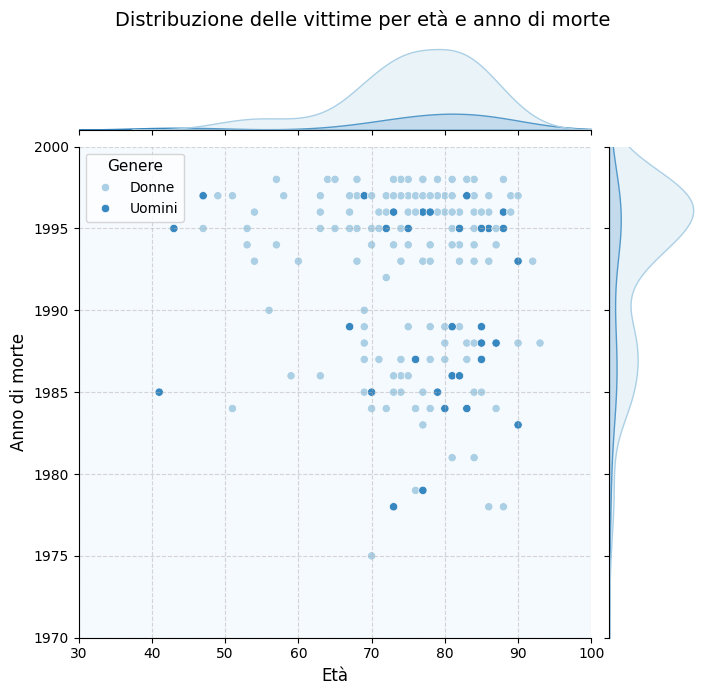

In [ ]:
# Plot base
g = sns.jointplot(
    data=shipman_victims,
    x="Age",
    y="yearOfDeath",
    hue="Genere",
    kind="scatter",
    height=7,
    palette="Blues"
)

# Titolo principale
g.fig.suptitle("Distribuzione delle vittime per età e anno di morte", fontsize=14)

# Etichette assi
g.set_axis_labels("Età", "Anno di morte", fontsize=12)

# Limiti degli assi (asse principale)
g.ax_joint.set_xlim(30, 100)
g.ax_joint.set_ylim(1970, 2000)

# Stile assi (griglia, ticks, ecc.)
g.ax_joint.grid(True, linestyle='--', alpha=0.5)
g.ax_joint.tick_params(labelsize=10)

# Stile della legenda
legend = g.ax_joint.legend(title="Genere", loc='upper left')
legend.get_title().set_fontsize(11)
legend.set_frame_on(True)

# Migliora la spaziatura del titolo rispetto al grafico
g.fig.subplots_adjust(top=0.93)


g.ax_joint.set_facecolor('#f5faff')


plt.show()




In [5]:
shipman_times
# Create a long format DataFrame for plotting
df_long = shipman_times.melt(id_vars="Hour",
                  value_vars=["Shipman", "Comparison"],
                  var_name="Source",
                  value_name="Count")
df_long


,Hour,Source,Count
0,0,Shipman,2.6
1,1,Shipman,1.0
2,2,Shipman,2.6
3,3,Shipman,3.0
4,4,Shipman,0.3
5,5,Shipman,1.2
6,6,Shipman,2.9
7,7,Shipman,1.8
8,8,Shipman,3.6
9,9,Shipman,2.6


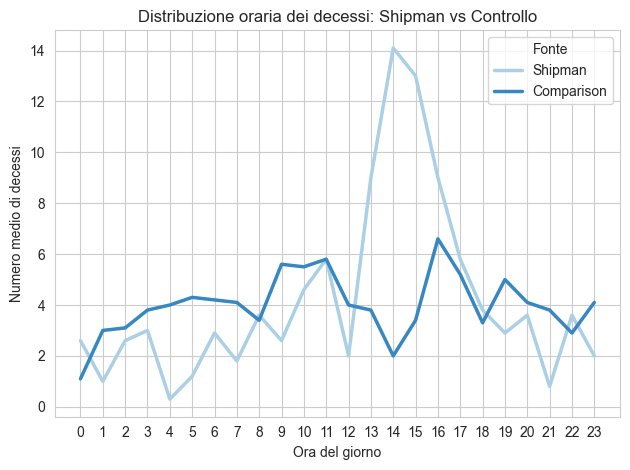

In [6]:

sns.set_style("whitegrid")  # oppure "whitegrid", "dark", "white", "ticks"
sns.lineplot(
    data=df_long,
    x="Hour",
    y="Count",
    hue="Source",
    palette="Blues",
    linewidth=2.5,

    
)

# Etichette e layout
plt.title("Distribuzione oraria dei decessi: Shipman vs Controllo")
plt.xlabel("Ora del giorno")
plt.ylabel("Numero medio di decessi")
plt.xticks(range(0, 24))
plt.legend(title="Fonte")
plt.tight_layout()
plt.show()